In [67]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [14]:
import pandas as pd

In [105]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
# 모든 경고 메시지 무시
warnings.filterwarnings('ignore')

In [9]:
# 나의 루트 경로 설정
path_dateset = '/gdrive/MyDrive/_Projects/재정데이터분석_미니프로젝트/DataSet/최종/'

In [23]:
df_1 = pd.read_csv(path_dateset + '시군구_전처리_킥보드사고건수,전체사고건수,사고율/시군구_킥보드사고건수,전체사고건수,사고율_데이터셋.csv').reset_index(drop=True)
df_1.head(3)

,시도,시군구,개인형이동장치(PM),전체사고건수,킥보드사고율
0,강원특별자치도,강릉시,10,760,1.315789
1,강원특별자치도,고성군,1,111,0.900901
2,강원특별자치도,동해시,9,316,2.848101


In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도           228 non-null    object 
 1   시군구          228 non-null    object 
 2   개인형이동장치(PM)  228 non-null    int64  
 3   전체사고건수       228 non-null    int64  
 4   킥보드사고율       228 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.0+ KB


In [25]:
df_2 = pd.read_csv(path_dateset + '시군구_인구밀도(전처리).csv').reset_index(drop=True)
df_2.head(3)

,시도,시군구,총인구수(2023년),면적(km²),인구밀도(명/km²)
0,강원특별자치도,강릉시,209439,1040.827452,201.22
1,강원특별자치도,고성군,27305,660.766514,41.32
2,강원특별자치도,동해시,88625,180.307717,491.52


In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도           228 non-null    object 
 1   시군구          228 non-null    object 
 2   총인구수(2023년)  228 non-null    int64  
 3   면적(km²)      228 non-null    float64
 4   인구밀도(명/km²)  228 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.0+ KB


In [28]:
df_3 = pd.read_csv(path_dateset + '전국자전거도로표준데이터(전처리)).csv').reset_index(drop=True)
df_3.head(3)

,시도,시군구,자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로
0,강원도,인제군,2.60,0.0,0.0,0.0
1,강원특별자치도,강릉시,280.33,0.0,0.0,0.0
2,강원특별자치도,삼척시,34.50,12.0,0.0,2.4


In [33]:
df_3.loc[df_3['시군구'] == '서귀포시', '시군구'] = '제주특별자치도'

In [36]:
df_3

,시도,시군구,자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로
0,강원도,인제군,2.600,0.000,0.000,0.000
1,강원특별자치도,강릉시,280.330,0.000,0.000,0.000
2,강원특별자치도,삼척시,34.500,12.000,0.000,2.400
3,강원특별자치도,영월군,2.600,0.000,4.000,0.000
4,강원특별자치도,홍천군,38.640,0.000,0.000,0.000
5,경기도,가평군,30.125,23.490,3.490,0.000
6,경기도,광주시,34.890,1.550,28.410,2.700
7,경기도,구리시,83.850,0.000,0.000,0.400
8,경기도,군포시,97.860,0.000,0.000,0.000
9,경기도,남양주시,233.970,4.090,2.180,0.340


In [49]:
merged_df = df_1.merge(df_2, on=['시도', '시군구'], how='left')\
              .merge(df_3, on=['시도', '시군구'], how='left')
merged_df.head(5)

,시도,시군구,개인형이동장치(PM),전체사고건수,킥보드사고율,총인구수(2023년),면적(km²),인구밀도(명/km²),자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로
0,강원특별자치도,강릉시,10,760,1.315789,209439.0,1040.827452,201.22,280.33,0.0,0.0,0.0
1,강원특별자치도,고성군,1,111,0.900901,27305.0,660.766514,41.32,NaN,NaN,NaN,NaN
2,강원특별자치도,동해시,9,316,2.848101,88625.0,180.307717,491.52,NaN,NaN,NaN,NaN
3,강원특별자치도,삼척시,5,202,2.475248,62651.0,1187.836727,52.74,34.50,12.0,0.0,2.4
4,강원특별자치도,속초시,3,364,0.824176,82054.0,105.753667,775.90,NaN,NaN,NaN,NaN


In [50]:
merged_df.shape

(229, 12)

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도           229 non-null    object 
 1   시군구          229 non-null    object 
 2   개인형이동장치(PM)  229 non-null    int64  
 3   전체사고건수       229 non-null    int64  
 4   킥보드사고율       229 non-null    float64
 5   총인구수(2023년)  228 non-null    float64
 6   면적(km²)      228 non-null    float64
 7   인구밀도(명/km²)  228 non-null    float64
 8   자전거보행자겸용도로   96 non-null     float64
 9   자전거우선도로      96 non-null     float64
 10  자전거전용도로      96 non-null     float64
 11  자전거전용차로      96 non-null     float64
dtypes: float64(8), int64(2), object(2)
memory usage: 21.6+ KB


In [52]:
merged_df.isnull().sum()

,0
시도,0
시군구,0
개인형이동장치(PM),0
전체사고건수,0
킥보드사고율,0
총인구수(2023년),1
면적(km²),1
인구밀도(명/km²),1
자전거보행자겸용도로,133
자전거우선도로,133


In [53]:
merged_df[merged_df['총인구수(2023년)'].isnull()]

,시도,시군구,개인형이동장치(PM),전체사고건수,킥보드사고율,총인구수(2023년),면적(km²),인구밀도(명/km²),자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로
123,부산광역시,진구,15,1393,1.076813,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
merged_df[merged_df['시군구'] == '상주시']

,시도,시군구,개인형이동장치(PM),전체사고건수,킥보드사고율,총인구수(2023년),면적(km²),인구밀도(명/km²),자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로
74,경상북도,상주시,13,433,3.002309,93858.0,1254.706154,74.8,59.23,2.65,108.0,2.9
75,경상북도,상주시,13,433,3.002309,93858.0,1254.706154,74.8,0.00,0.00,4.8,0.0


In [56]:
merged_df.drop(index=75, inplace=True)

### 상관계수 비교 함수 추

In [155]:
def bike_road_corr(df_O, df_X, target_var, selected_vars):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 상관계수 계산 for df_O
    # target_var = '개인형이동장치(PM)'
    # selected_vars = ['총인구수(2023년)', '면적(km²)', '인구밀도(명/km²)',
    #                 '자전거보행자겸용도로', '자전거우선도로', '자전거전용도로', '자전거전용차로']
    corr_O = df_O[selected_vars + [target_var]].corr()[target_var].drop(target_var)

    # 상관계수 계산 for df_X
    corr_X = df_X[selected_vars + [target_var]].corr()[target_var].drop(target_var)

    # 서브플롯 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # 첫 번째 그래프 (왼쪽)
    sns.barplot(x=corr_O.index, y=corr_O.values, palette="coolwarm", ax=ax1)
    ax1.set_title(f'Correlation with {target_var} (df_O)')
    ax1.set_ylabel('Correlation Coefficient')
    ax1.set_xlabel('Variables')
    ax1.axhline(y=0, color='gray', linestyle='--')
    ax1.set_xticklabels(corr_O.index, rotation=45, ha='right')
    ax1.set_ylim(-1.1, 1.1)
    for i, v in enumerate(corr_O.values):
        ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom')

    if df_X is not None:
      # 두 번째 그래프 (오른쪽)
      sns.barplot(x=corr_X.index, y=corr_X.values, palette="coolwarm", ax=ax2)
      ax2.set_title(f'Correlation with {target_var} (df_X)')
      ax2.set_ylabel('Correlation Coefficient')
      ax2.set_xlabel('Variables')
      ax2.axhline(y=0, color='gray', linestyle='--')
      ax2.set_xticklabels(corr_X.index, rotation=45, ha='right')
      ax2.set_ylim(-1.1, 1.1)
      for i, v in enumerate(corr_X.values):
          ax2.text(i, v, f'{v:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

---
## 피처 변수 생성

In [146]:
merged_df['개인형이동장치(PM)/총인구수(2023년)'] = (merged_df['개인형이동장치(PM)'] / merged_df['총인구수(2023년)']) * 100000
merged_df['개인형이동장치(PM)/면적(km²)'] = merged_df['개인형이동장치(PM)'] / merged_df['면적(km²)']
merged_df['개인형이동장치(PM)/인구밀도(명/km²)'] = merged_df['개인형이동장치(PM)'] / merged_df['인구밀도(명/km²)']

In [165]:
merged_df['자전거보행자겸용도로/총인구수(2023년)'] = merged_df['자전거보행자겸용도로'] / merged_df['총인구수(2023년)'] * 100000
merged_df['자전거우선도로/총인구수(2023년)'] = merged_df['자전거우선도로'] / merged_df['총인구수(2023년)'] * 100000
merged_df['자전거전용도로/총인구수(2023년)'] = merged_df['자전거전용도로'] / merged_df['총인구수(2023년)'] * 100000
merged_df['자전거전용차로/총인구수(2023년)'] = merged_df['자전거전용차로'] / merged_df['총인구수(2023년)'] * 100000

In [167]:
merged_df.head(3)

,시도,시군구,개인형이동장치(PM),전체사고건수,킥보드사고율,총인구수(2023년),면적(km²),인구밀도(명/km²),자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로,개인형이동장치(PM)/총인구수(2023년),개인형이동장치(PM)/면적(km²),개인형이동장치(PM)/인구밀도(명/km²),자전거보행자겸용도로/총인구수(2023년),자전거우선도로/총인구수(2023년),자전거전용도로/총인구수(2023년),자전거전용차로/총인구수(2023년)
0,강원특별자치도,강릉시,10,760,1.315789,209439.0,1040.827452,201.22,280.33,0.0,0.0,0.0,4.774660,0.009608,0.049697,133.848042,0.0,0.0,0.0
1,강원특별자치도,고성군,1,111,0.900901,27305.0,660.766514,41.32,NaN,NaN,NaN,NaN,3.662333,0.001513,0.024201,NaN,NaN,NaN,NaN
2,강원특별자치도,동해시,9,316,2.848101,88625.0,180.307717,491.52,NaN,NaN,NaN,NaN,10.155148,0.049915,0.018311,NaN,NaN,NaN,NaN


In [183]:
df_br_O = merged_df[~merged_df['자전거보행자겸용도로'].isnull() == True]
df_br_X = merged_df[merged_df['자전거보행자겸용도로'].isnull() == True]

In [184]:
print(df_br_O.shape, df_br_X.shape)

(95, 19) (133, 19)


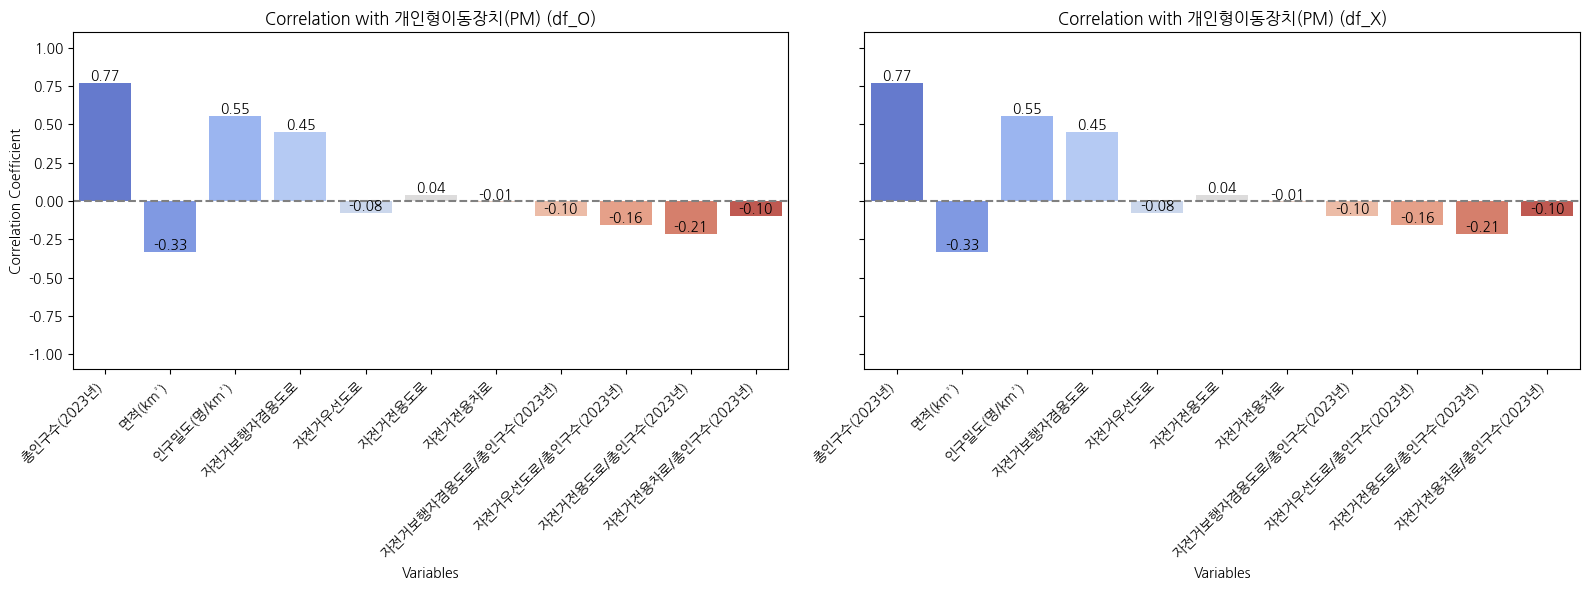

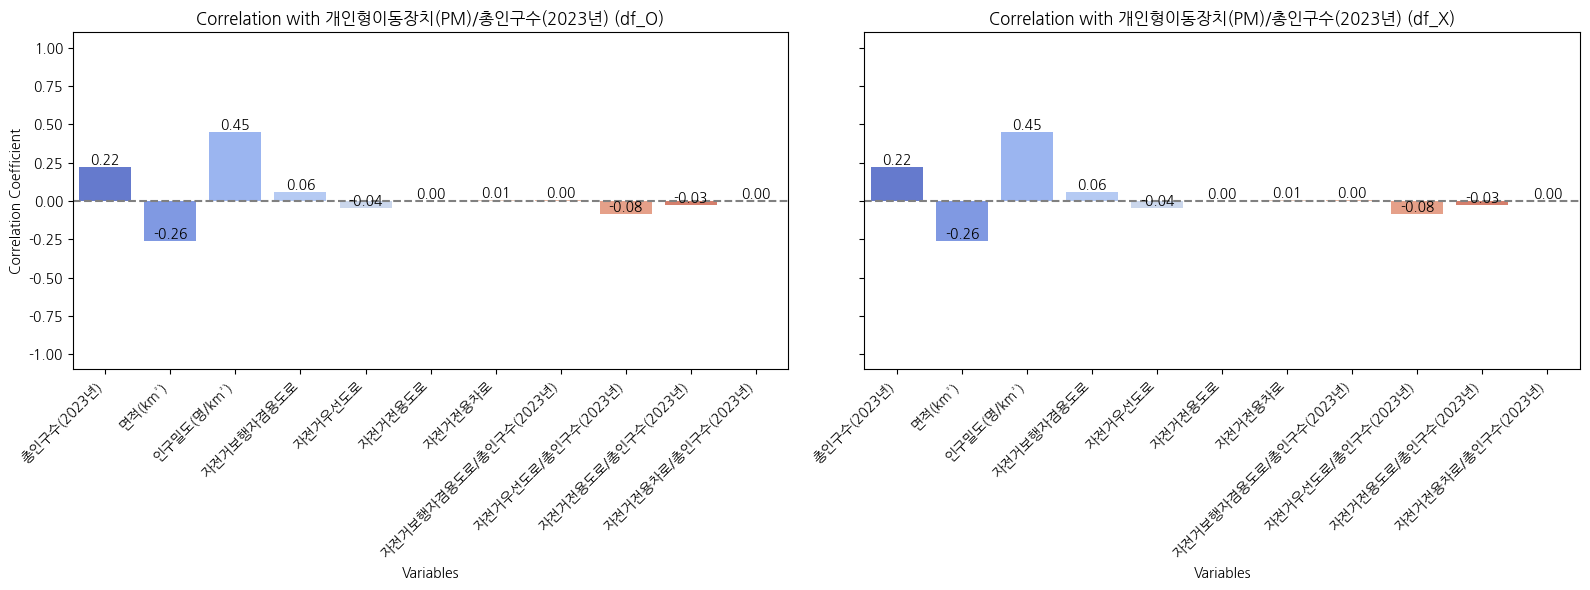

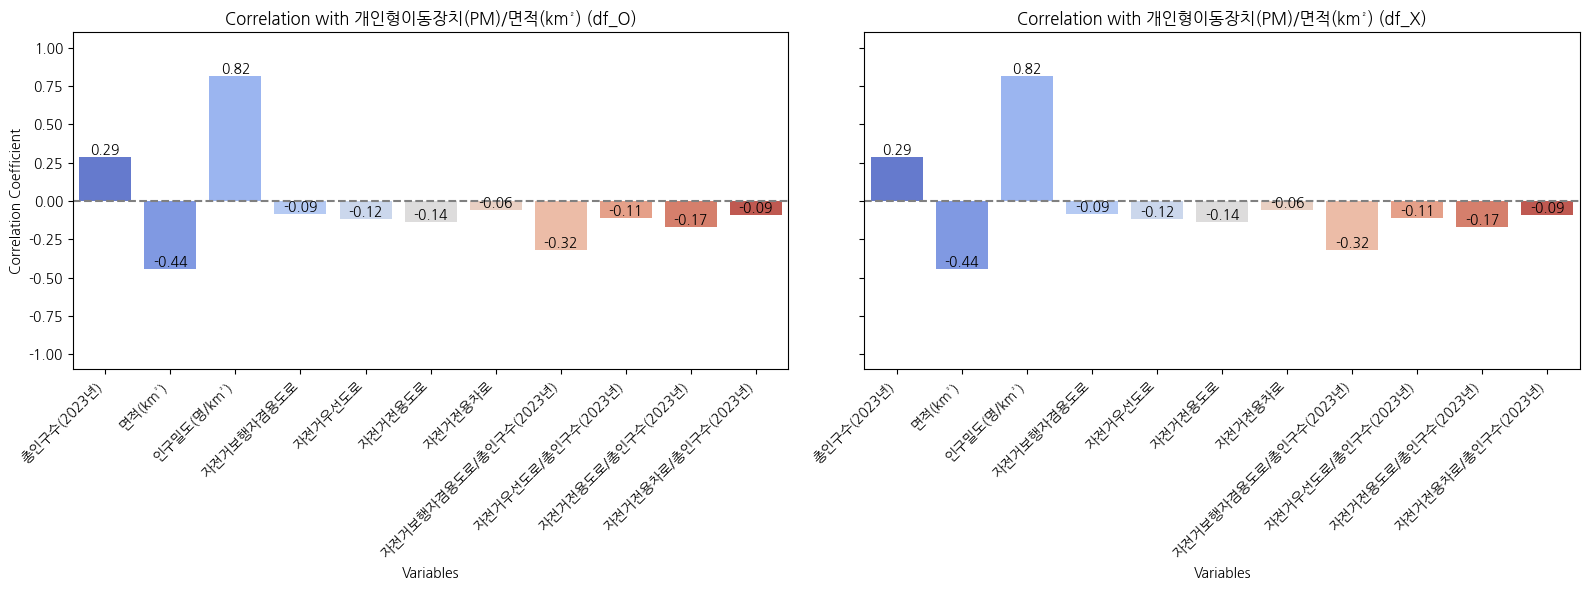

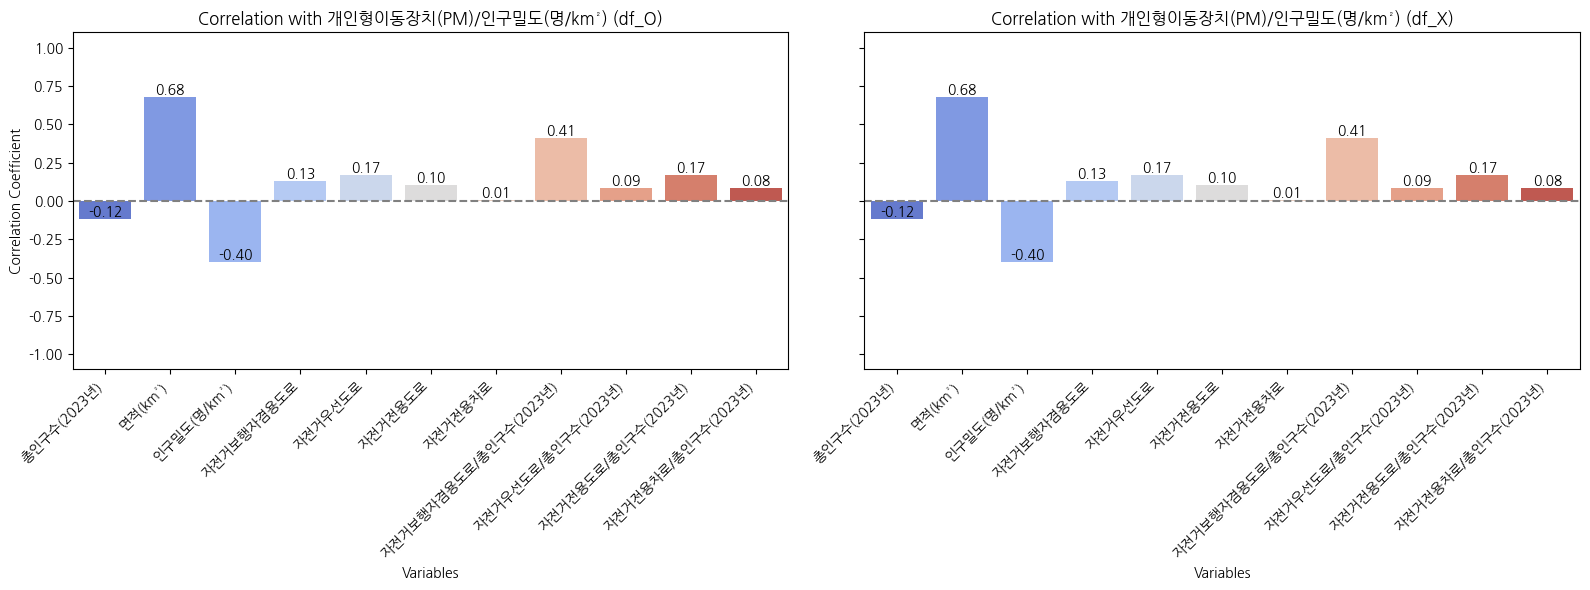

In [177]:
#df_br_O_2 = merged_df.fillna(0)
df_br_O_2 = merged_df

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# 스케일러 객체 생성
mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

# MinMax Scaling 적용
# df_br_O_2 = pd.DataFrame(mms.fit_transform(df_br_O_2[df_br_O_2.select_dtypes(include='number').columns]), columns = df_br_O_2.select_dtypes(include='number').columns)

# Standard Scaling 적용
# df_br_O_2 = pd.DataFrame(ss.fit_transform(df_br_O_2[df_br_O_2.select_dtypes(include='number').columns]), columns = df_br_O_2.select_dtypes(include='number').columns)

# Robust Scaling 적용
df_br_O_2 = pd.DataFrame(rs.fit_transform(df_br_O_2[df_br_O_2.select_dtypes(include='number').columns]), columns = df_br_O_2.select_dtypes(include='number').columns)


target_vars = ['개인형이동장치(PM)', '개인형이동장치(PM)/총인구수(2023년)', '개인형이동장치(PM)/면적(km²)', '개인형이동장치(PM)/인구밀도(명/km²)']

for tv in target_vars:
  target_var = tv
  # selected_vars = ['총인구수(2023년)', '면적(km²)', '인구밀도(명/km²)', '자전거보행자겸용도로', '자전거우선도로', '자전거전용도로', '자전거전용차로']
  selected_vars = ['총인구수(2023년)', '면적(km²)', '인구밀도(명/km²)', '자전거보행자겸용도로', '자전거우선도로', '자전거전용도로', '자전거전용차로', '자전거보행자겸용도로/총인구수(2023년)', '자전거우선도로/총인구수(2023년)', '자전거전용도로/총인구수(2023년)', '자전거전용차로/총인구수(2023년)']
  bike_road_corr(df_br_O_2, df_br_O_2, target_var, selected_vars)

---
### 결측치 삭제 & 스케일 테스트

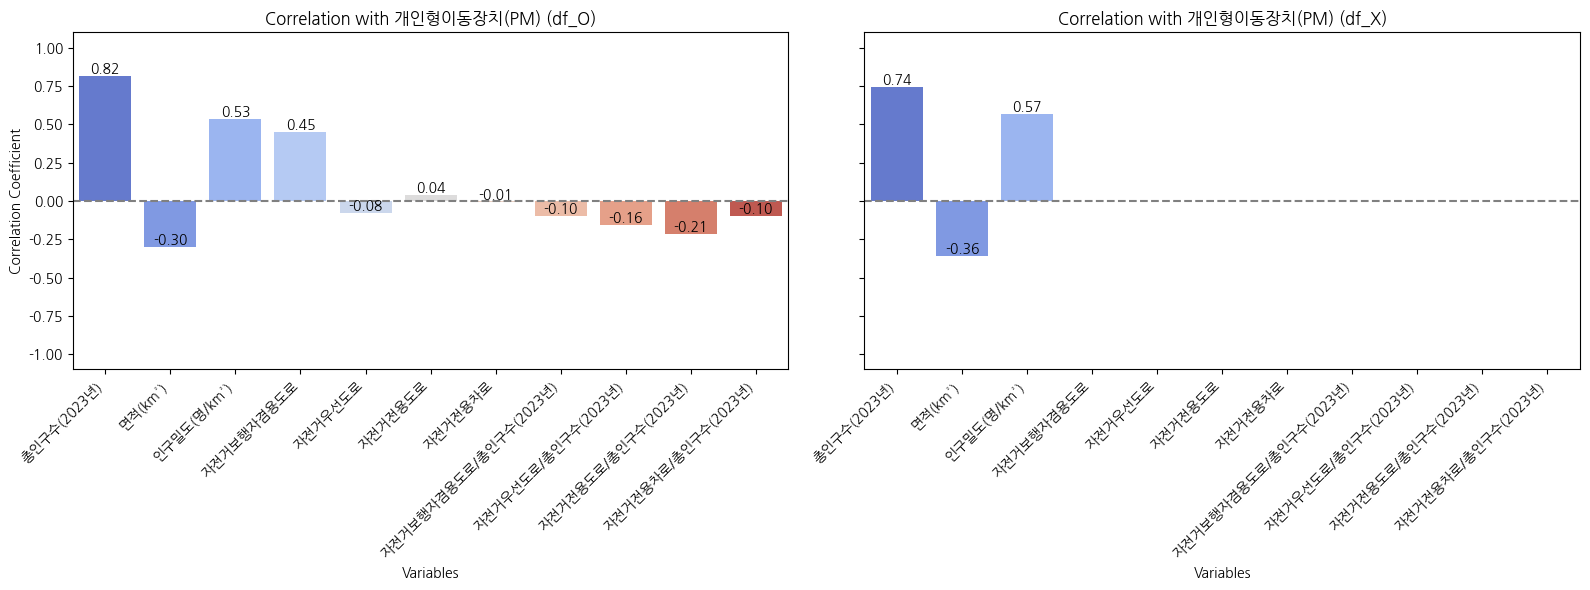

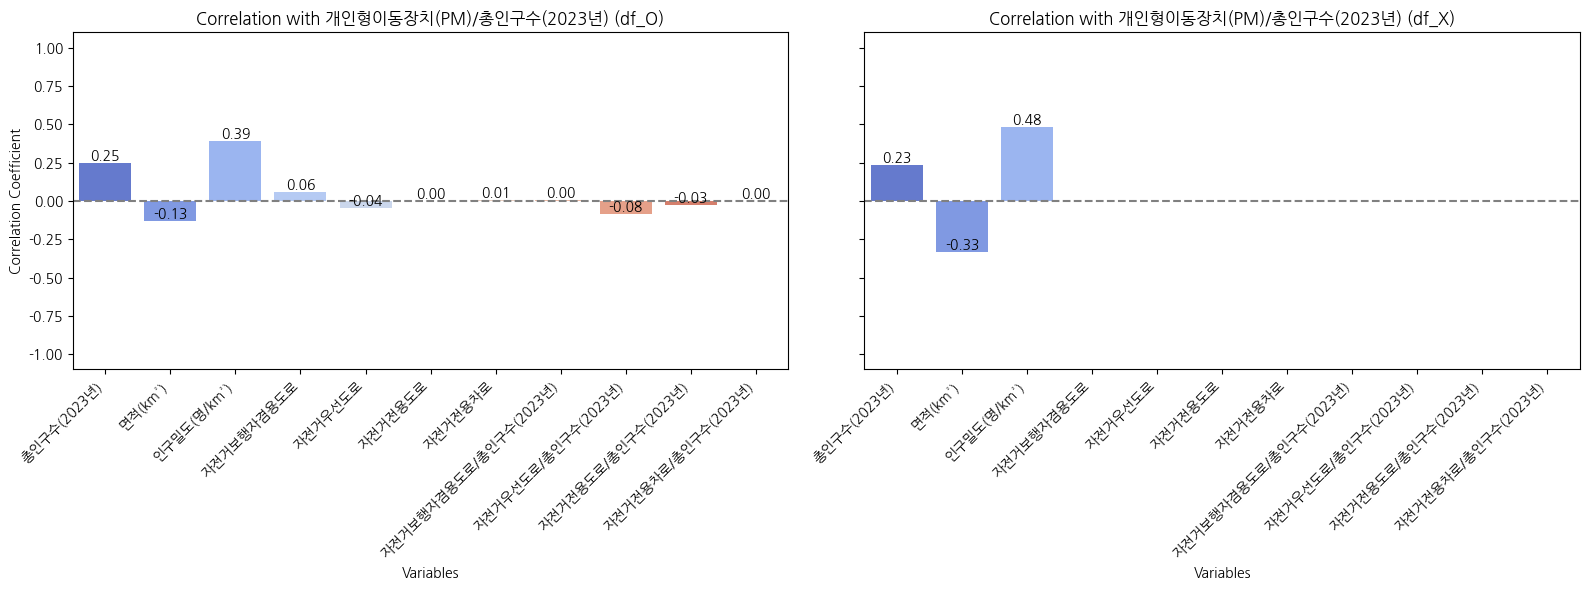

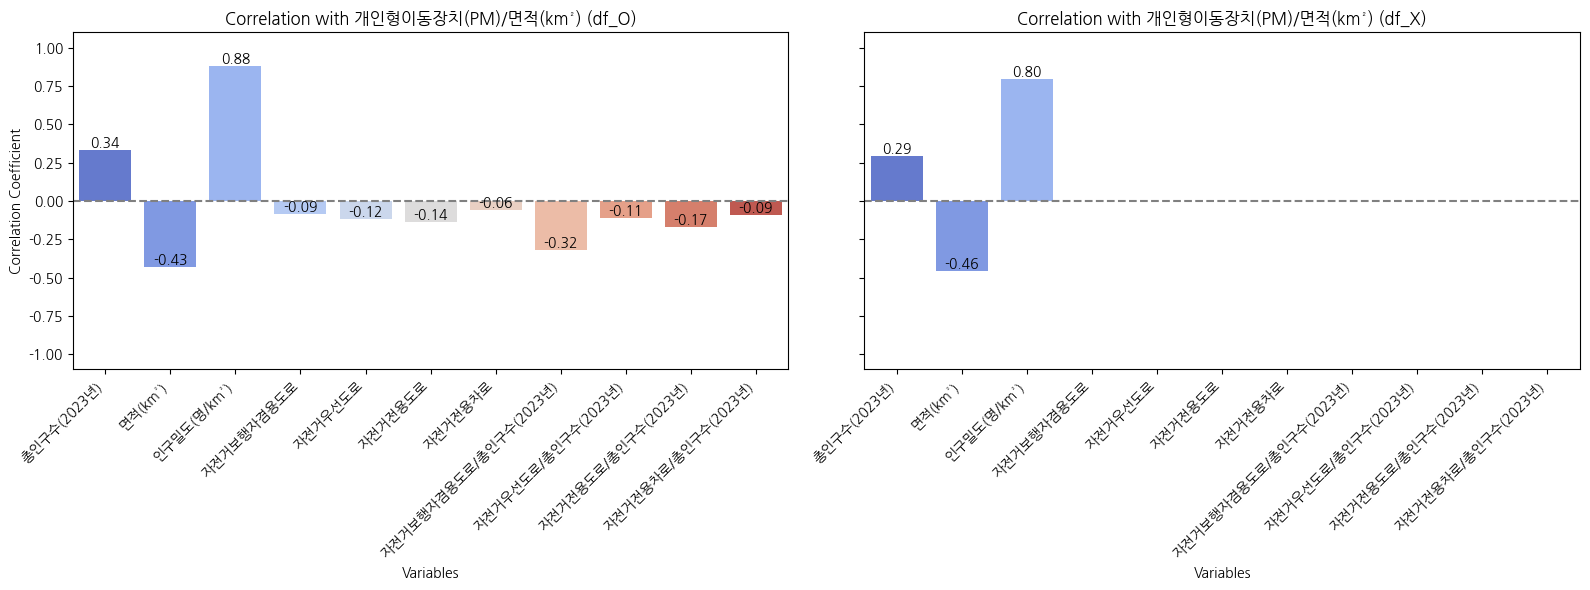

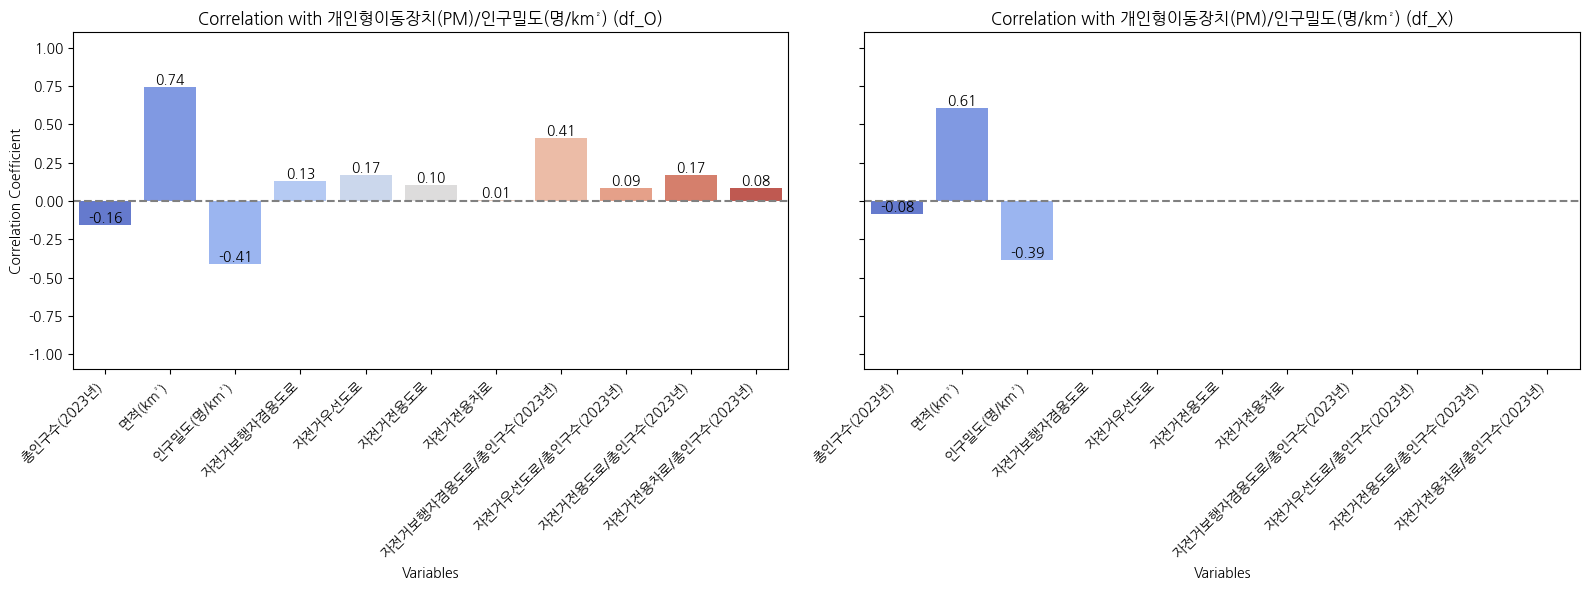

In [187]:
df_br_O_2 = df_br_O.fillna(0)
df_br_X_2 = df_br_X.fillna(0)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# 스케일러 객체 생성
mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

df_br_O_2 = pd.DataFrame(rs.fit_transform(df_br_O_2[df_br_O_2.select_dtypes(include='number').columns]), columns = df_br_O_2.select_dtypes(include='number').columns)
df_br_X_2 = pd.DataFrame(rs.fit_transform(df_br_X_2[df_br_X_2.select_dtypes(include='number').columns]), columns = df_br_X_2.select_dtypes(include='number').columns)

target_vars = ['개인형이동장치(PM)', '개인형이동장치(PM)/총인구수(2023년)', '개인형이동장치(PM)/면적(km²)', '개인형이동장치(PM)/인구밀도(명/km²)']

for tv in target_vars:
  target_var = tv
  # selected_vars = ['총인구수(2023년)', '면적(km²)', '인구밀도(명/km²)', '자전거보행자겸용도로', '자전거우선도로', '자전거전용도로', '자전거전용차로']
  selected_vars = ['총인구수(2023년)', '면적(km²)', '인구밀도(명/km²)', '자전거보행자겸용도로', '자전거우선도로', '자전거전용도로', '자전거전용차로', '자전거보행자겸용도로/총인구수(2023년)', '자전거우선도로/총인구수(2023년)', '자전거전용도로/총인구수(2023년)', '자전거전용차로/총인구수(2023년)']
  bike_road_corr(df_br_O_2, df_br_X_2, target_var, selected_vars)

In [188]:
merged_df.head(3)

,시도,시군구,개인형이동장치(PM),전체사고건수,킥보드사고율,총인구수(2023년),면적(km²),인구밀도(명/km²),자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로,개인형이동장치(PM)/총인구수(2023년),개인형이동장치(PM)/면적(km²),개인형이동장치(PM)/인구밀도(명/km²),자전거보행자겸용도로/총인구수(2023년),자전거우선도로/총인구수(2023년),자전거전용도로/총인구수(2023년),자전거전용차로/총인구수(2023년)
0,강원특별자치도,강릉시,10,760,1.315789,209439.0,1040.827452,201.22,280.33,0.0,0.0,0.0,4.774660,0.009608,0.049697,133.848042,0.0,0.0,0.0
1,강원특별자치도,고성군,1,111,0.900901,27305.0,660.766514,41.32,NaN,NaN,NaN,NaN,3.662333,0.001513,0.024201,NaN,NaN,NaN,NaN
2,강원특별자치도,동해시,9,316,2.848101,88625.0,180.307717,491.52,NaN,NaN,NaN,NaN,10.155148,0.049915,0.018311,NaN,NaN,NaN,NaN


In [189]:
df_3 = pd.read_csv(path_dateset + '재정자주도_자립도_통합재정수지비율(병합).csv').reset_index(drop=True)
df_3.head(3)

,자치단체,자체수입,자주재원,자치단체 예산규모,재정자주도[당초],시도,시군구,재정자립도[당초],교부세비율,국고보조금비율,세입,지출,순융자,통합재정규모,통합재정수지비율[당초]
0,서울종로구,209783,80588,498962,58.19,서울특별시,종로구,42.04,16.15,41.81,491181,580958,1271,582228,-15.64
1,서울중구,281447,25976,524792,58.58,서울특별시,중구,53.63,4.95,41.42,493300,587593,462,588055,-16.11
2,서울용산구,232426,75829,590040,52.24,서울특별시,용산구,39.39,12.85,47.76,579934,605121,3511,608632,-4.72


In [190]:
df_3.shape

(228, 15)

In [191]:
merged_df_2 = pd.merge(merged_df, df_3, on=['시도', '시군구'], how='left')
merged_df_2.head(3)

,시도,시군구,개인형이동장치(PM),전체사고건수,킥보드사고율,총인구수(2023년),면적(km²),인구밀도(명/km²),자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로,개인형이동장치(PM)/총인구수(2023년),개인형이동장치(PM)/면적(km²),개인형이동장치(PM)/인구밀도(명/km²),자전거보행자겸용도로/총인구수(2023년),자전거우선도로/총인구수(2023년),자전거전용도로/총인구수(2023년),자전거전용차로/총인구수(2023년),자치단체,자체수입,자주재원,자치단체 예산규모,재정자주도[당초],재정자립도[당초],교부세비율,국고보조금비율,세입,지출,순융자,통합재정규모,통합재정수지비율[당초]
0,강원특별자치도,강릉시,10,760,1.315789,209439.0,1040.827452,201.22,280.33,0.0,0.0,0.0,4.774660,0.009608,0.049697,133.848042,0.0,0.0,0.0,강원강릉시,211103.0,526699.0,1264264.0,58.36,16.70,41.66,41.64,1352979.0,1410880.0,247.0,1411127.0,-4.12
1,강원특별자치도,고성군,1,111,0.900901,27305.0,660.766514,41.32,NaN,NaN,NaN,NaN,3.662333,0.001513,0.024201,NaN,NaN,NaN,NaN,강원고성군,39515.0,191898.0,389361.0,59.43,10.15,49.28,40.57,396783.0,402573.0,-9.0,402564.0,-1.44
2,강원특별자치도,동해시,9,316,2.848101,88625.0,180.307717,491.52,NaN,NaN,NaN,NaN,10.155148,0.049915,0.018311,NaN,NaN,NaN,NaN,강원동해시,80734.0,171239.0,454300.0,55.46,17.77,37.69,44.54,497136.0,496163.0,-20.0,496143.0,0.20


In [192]:
merged_df_2.shape

(228, 32)

In [193]:
merged_df_2.columns

Index(['시도', '시군구', '개인형이동장치(PM)', '전체사고건수', '킥보드사고율', '총인구수(2023년)',
       '면적(km²)', '인구밀도(명/km²)', '자전거보행자겸용도로', '자전거우선도로', '자전거전용도로', '자전거전용차로',
       '개인형이동장치(PM)/총인구수(2023년)', '개인형이동장치(PM)/면적(km²)',
       '개인형이동장치(PM)/인구밀도(명/km²)', '자전거보행자겸용도로/총인구수(2023년)',
       '자전거우선도로/총인구수(2023년)', '자전거전용도로/총인구수(2023년)', '자전거전용차로/총인구수(2023년)',
       '자치단체', '자체수입', '자주재원', '자치단체 예산규모', '재정자주도[당초]', '재정자립도[당초]', '교부세비율',
       '국고보조금비율', '세입', '지출', '순융자', '통합재정규모', '통합재정수지비율[당초]'],
      dtype='object')

In [196]:
df_4 = pd.read_csv(path_dateset + '우리 지자체 예산서(완성)v1.0(전처리)).csv').reset_index(drop=True)
df_4.head(3)

,시도,시군구,도로,대중교통_물류등기타,합계
0,서울특별시,종로구,1.79,6.19,7.98
1,서울특별시,중구,0.86,1.75,2.61
2,서울특별시,용산구,2.33,0.47,2.80


In [197]:
df_4.shape

(228, 5)

In [198]:
merged_df_3 = pd.merge(merged_df_2, df_4, on=['시도', '시군구'], how='left')
merged_df_3.head(3)

,시도,시군구,개인형이동장치(PM),전체사고건수,킥보드사고율,총인구수(2023년),면적(km²),인구밀도(명/km²),자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로,개인형이동장치(PM)/총인구수(2023년),개인형이동장치(PM)/면적(km²),개인형이동장치(PM)/인구밀도(명/km²),자전거보행자겸용도로/총인구수(2023년),자전거우선도로/총인구수(2023년),자전거전용도로/총인구수(2023년),자전거전용차로/총인구수(2023년),자치단체,자체수입,자주재원,자치단체 예산규모,재정자주도[당초],재정자립도[당초],교부세비율,국고보조금비율,세입,지출,순융자,통합재정규모,통합재정수지비율[당초],도로,대중교통_물류등기타,합계
0,강원특별자치도,강릉시,10,760,1.315789,209439.0,1040.827452,201.22,280.33,0.0,0.0,0.0,4.774660,0.009608,0.049697,133.848042,0.0,0.0,0.0,강원강릉시,211103.0,526699.0,1264264.0,58.36,16.70,41.66,41.64,1352979.0,1410880.0,247.0,1411127.0,-4.12,1.19,4.19,5.38
1,강원특별자치도,고성군,1,111,0.900901,27305.0,660.766514,41.32,NaN,NaN,NaN,NaN,3.662333,0.001513,0.024201,NaN,NaN,NaN,NaN,강원고성군,39515.0,191898.0,389361.0,59.43,10.15,49.28,40.57,396783.0,402573.0,-9.0,402564.0,-1.44,1.32,1.13,2.45
2,강원특별자치도,동해시,9,316,2.848101,88625.0,180.307717,491.52,NaN,NaN,NaN,NaN,10.155148,0.049915,0.018311,NaN,NaN,NaN,NaN,강원동해시,80734.0,171239.0,454300.0,55.46,17.77,37.69,44.54,497136.0,496163.0,-20.0,496143.0,0.20,1.37,2.59,3.96


In [199]:
merged_df_3.shape

(228, 35)

In [200]:
merged_df_3.head(3)

,시도,시군구,개인형이동장치(PM),전체사고건수,킥보드사고율,총인구수(2023년),면적(km²),인구밀도(명/km²),자전거보행자겸용도로,자전거우선도로,자전거전용도로,자전거전용차로,개인형이동장치(PM)/총인구수(2023년),개인형이동장치(PM)/면적(km²),개인형이동장치(PM)/인구밀도(명/km²),자전거보행자겸용도로/총인구수(2023년),자전거우선도로/총인구수(2023년),자전거전용도로/총인구수(2023년),자전거전용차로/총인구수(2023년),자치단체,자체수입,자주재원,자치단체 예산규모,재정자주도[당초],재정자립도[당초],교부세비율,국고보조금비율,세입,지출,순융자,통합재정규모,통합재정수지비율[당초],도로,대중교통_물류등기타,합계
0,강원특별자치도,강릉시,10,760,1.315789,209439.0,1040.827452,201.22,280.33,0.0,0.0,0.0,4.774660,0.009608,0.049697,133.848042,0.0,0.0,0.0,강원강릉시,211103.0,526699.0,1264264.0,58.36,16.70,41.66,41.64,1352979.0,1410880.0,247.0,1411127.0,-4.12,1.19,4.19,5.38
1,강원특별자치도,고성군,1,111,0.900901,27305.0,660.766514,41.32,NaN,NaN,NaN,NaN,3.662333,0.001513,0.024201,NaN,NaN,NaN,NaN,강원고성군,39515.0,191898.0,389361.0,59.43,10.15,49.28,40.57,396783.0,402573.0,-9.0,402564.0,-1.44,1.32,1.13,2.45
2,강원특별자치도,동해시,9,316,2.848101,88625.0,180.307717,491.52,NaN,NaN,NaN,NaN,10.155148,0.049915,0.018311,NaN,NaN,NaN,NaN,강원동해시,80734.0,171239.0,454300.0,55.46,17.77,37.69,44.54,497136.0,496163.0,-20.0,496143.0,0.20,1.37,2.59,3.96


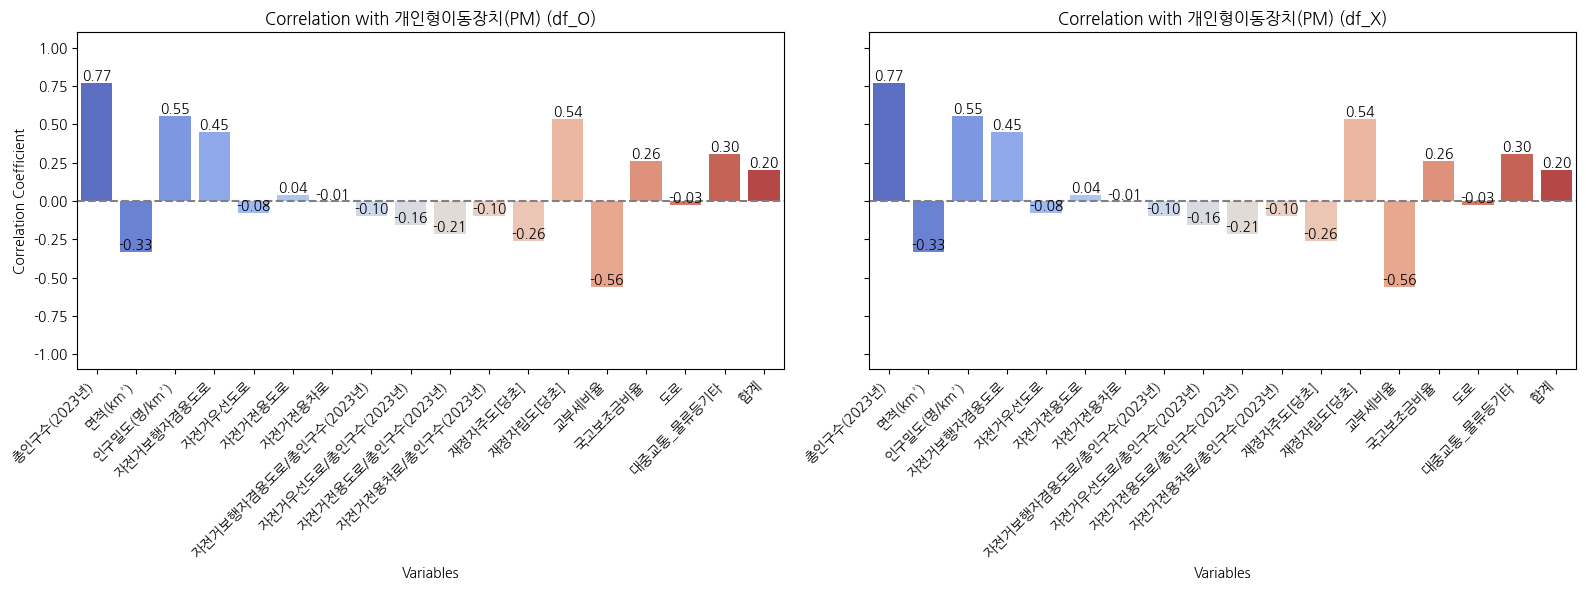

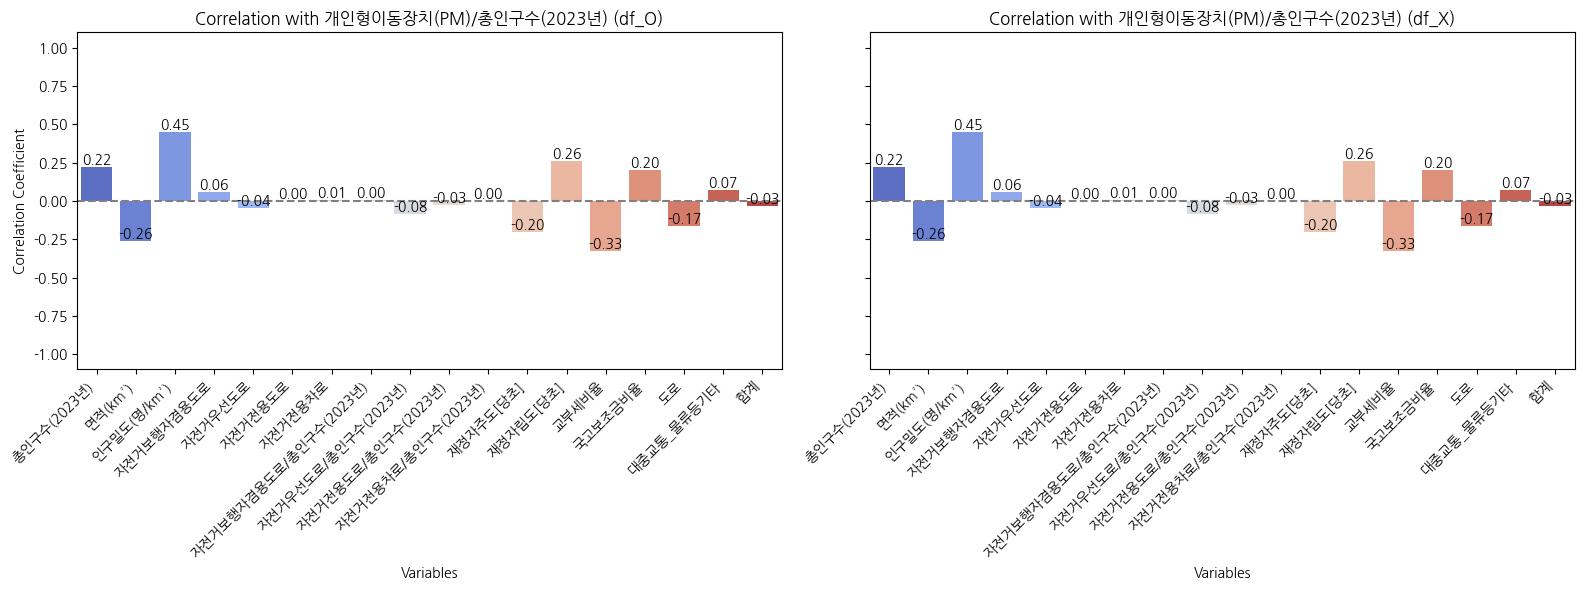

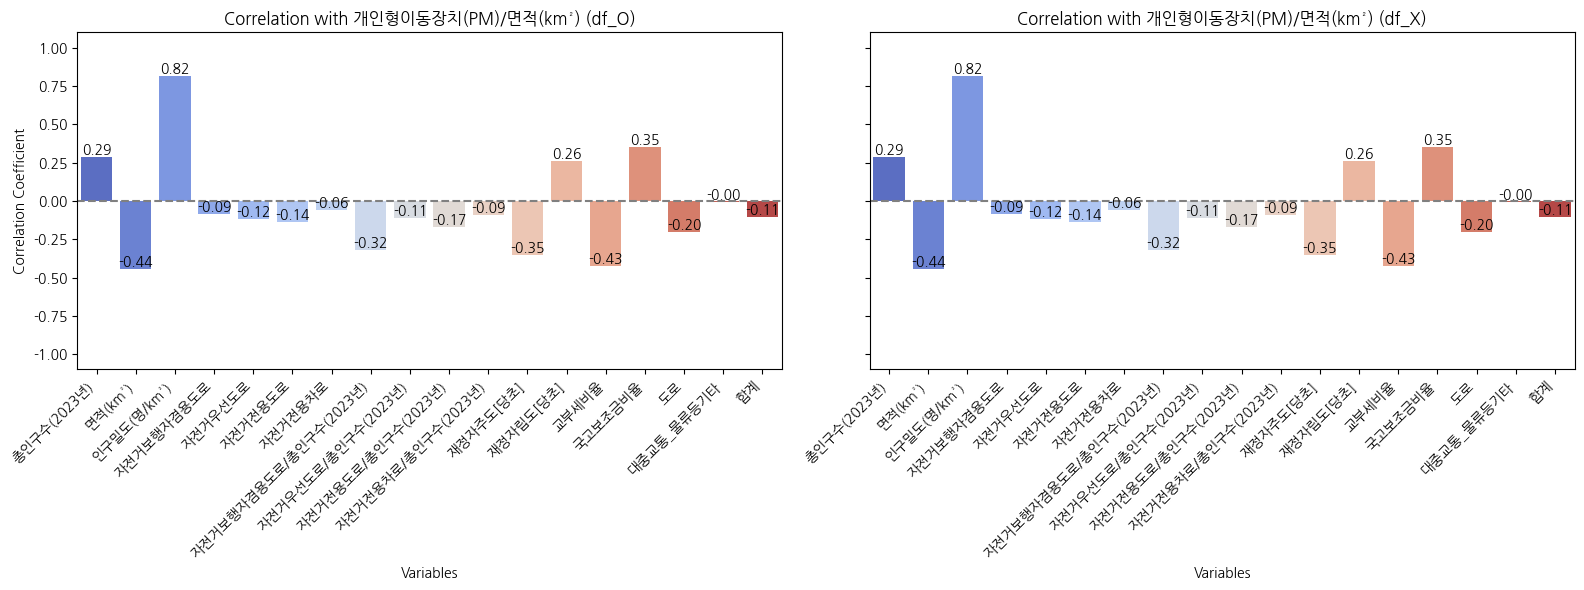

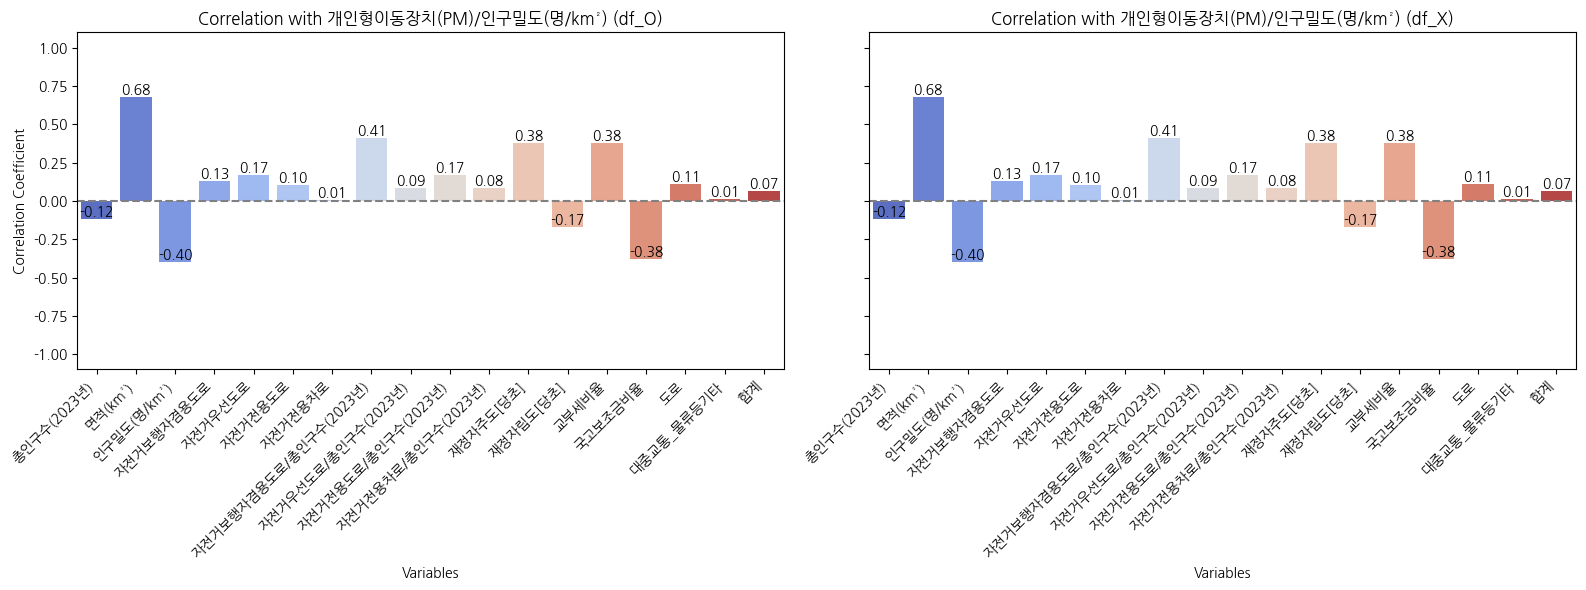

In [206]:
df_br_O_2 = merged_df_3

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# 스케일러 객체 생성
mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

df_br_O_2 = pd.DataFrame(mms.fit_transform(df_br_O_2[df_br_O_2.select_dtypes(include='number').columns]), columns = df_br_O_2.select_dtypes(include='number').columns)

target_vars = ['개인형이동장치(PM)', '개인형이동장치(PM)/총인구수(2023년)', '개인형이동장치(PM)/면적(km²)', '개인형이동장치(PM)/인구밀도(명/km²)']

for tv in target_vars:
  target_var = tv
  selected_vars = ['총인구수(2023년)', '면적(km²)', '인구밀도(명/km²)', '자전거보행자겸용도로', '자전거우선도로', '자전거전용도로', '자전거전용차로', \
                   '자전거보행자겸용도로/총인구수(2023년)', '자전거우선도로/총인구수(2023년)', '자전거전용도로/총인구수(2023년)', '자전거전용차로/총인구수(2023년)',\
                   '재정자주도[당초]', '재정자립도[당초]', '교부세비율', '국고보조금비율',\
                   '도로', '대중교통_물류등기타', '합계']
  bike_road_corr(df_br_O_2, df_br_O_2, target_var, selected_vars)